In [3]:
%matplotlib inline
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import mpl_finance as mpf

from talib import abstract

import twstock

ModuleNotFoundError: No module named 'mpl_finance'

In [ ]:
sid = '2454'
data = twstock.Stock(sid)

In [ ]:
df = pd.DataFrame(data.fetch_from(2018,5))

df.set_index('date', inplace = True)
df.head()

In [ ]:
df.index = df.index.format(formatter = lambda x:x.strftime('%Y-%m-%d')) 
df.index[::10]

In [ ]:
fig = plt.figure(figsize= (24, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(range(0, len(df.index), 10))
ax.set_xticklabels(df.index[::10],rotation = 90)
mpf.candlestick2_ochl(ax, df['open'], df['close'], df['high'],
df['low'], width=0.6, colorup='r', colordown='g', alpha=0.75);

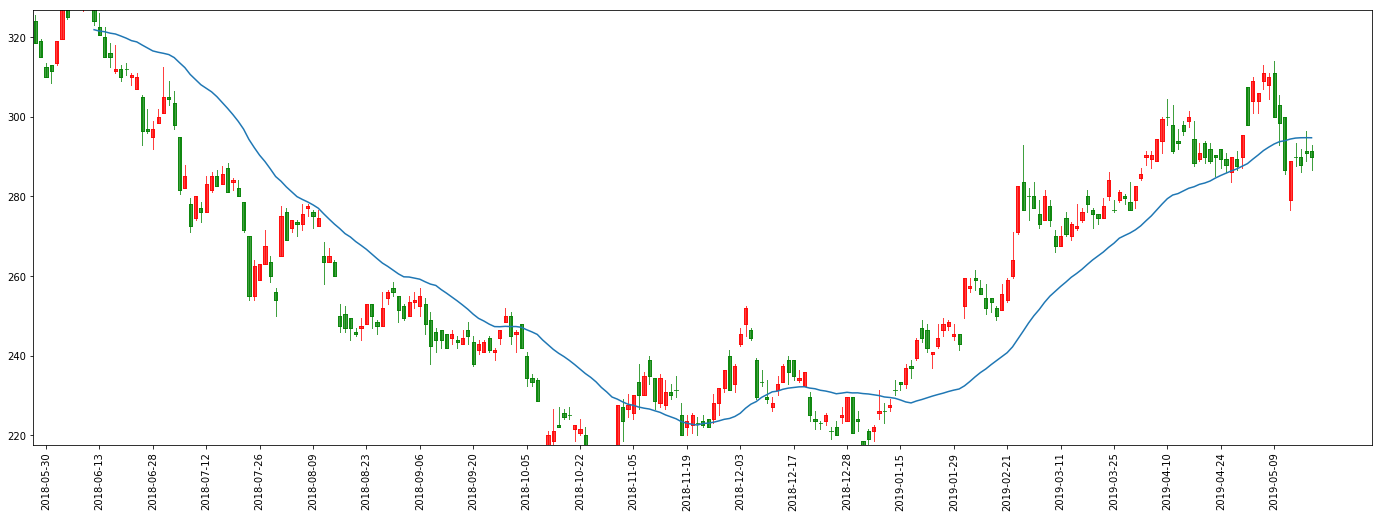

In [24]:
sma = abstract.SMA(df)
fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(1, 1, 1)

ax.set_xticks(range(0, len(df.index), 10))
ax.set_xticklabels(df.index[::10],rotation=90)
mpf.candlestick2_ochl(ax, df['open'], df['close'], df['high'],
df['low'], width=0.6, colorup='r', colordown='g', alpha=0.75); 
ax.plot(sma)

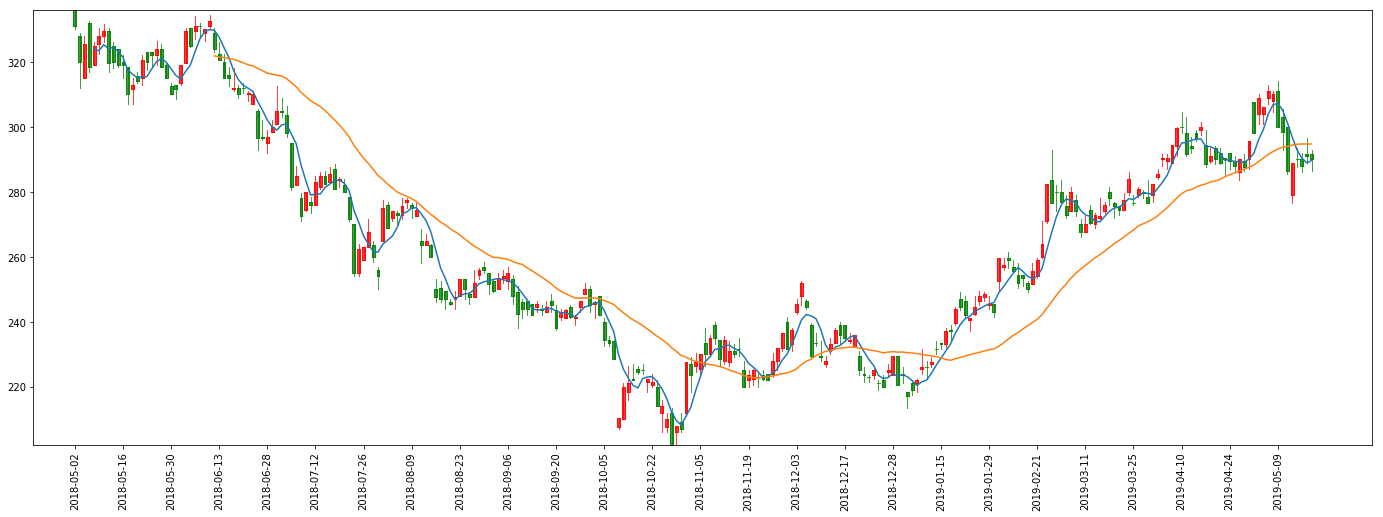

In [25]:
sma_5 = abstract.SMA(df,5)
sma_30 = abstract.SMA(df,30)
fig = plt.figure(figsize=(24, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(range(0, len(df.index), 10))
ax.set_xticklabels(df.index[::10],rotation=90)
mpf.candlestick2_ohlc(ax, df['open'],df['high'], df['low'],
df['close'], width=0.6, colorup='r', colordown='g', alpha=0.75);
ax.plot(sma_5)
ax.plot(sma_30)

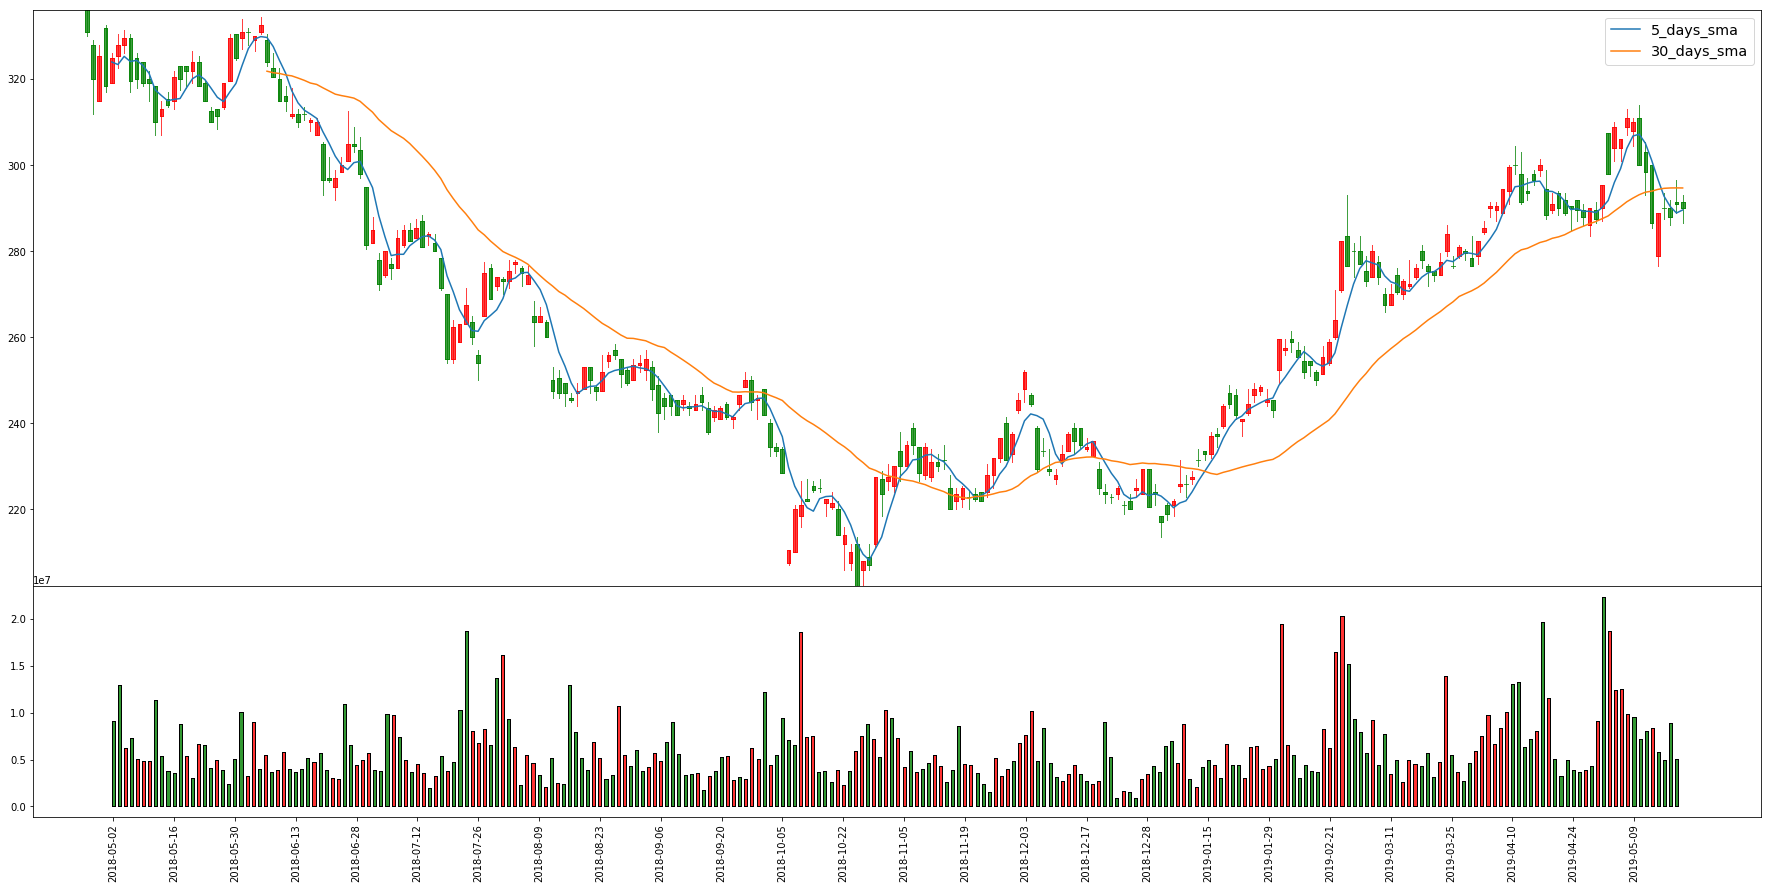

In [26]:
fig = plt.figure(figsize=(24, 16))

ax = fig.add_axes([0,0.2,1,0.5])
ax2 = fig.add_axes([0,0,1,0.2])
ax2.set_xticks(range(0, len(df.index), 10))
ax2.set_xticklabels(df.index[::10],rotation=90)

mpf.candlestick2_ohlc(ax, df['open'],df['high'], df['low'], df['close'], width=0.6, colorup='r', colordown='g', alpha=0.75); 
mpf.volume_overlay(ax2, df['open'], df['close'], df['capacity'], colorup='r', colordown='g', width=0.5, alpha=0.8)

sma_5 = abstract.SMA(df,5)
sma_30 = abstract.SMA(df,30)
ax.plot(sma_5, label='5_days_sma')
ax.plot(sma_30, label='30_days_sma')
ax.legend(fontsize='x-large')

In [27]:
abstract.STOCH(df).head(10)

,slowk,slowd
2018-05-02,NaN,NaN
2018-05-03,NaN,NaN
2018-05-04,NaN,NaN
2018-05-07,NaN,NaN
2018-05-08,NaN,NaN
2018-05-09,NaN,NaN
2018-05-10,NaN,NaN
2018-05-11,NaN,NaN
2018-05-14,39.891943,55.505799
2018-05-15,16.870597,38.591397


In [28]:
KD = abstract.STOCH(df)
KD.index=df['close'].index
df['K'] = KD['slowk']
df['D'] = KD['slowd']
df.head(10)

,capacity,turnover,open,high,low,close,change,transaction,K,D
2018-05-02,9126980,3057254740,341.5,343.0,330.0,331.0,-9.0,5643,NaN,NaN
2018-05-03,12988126,4144889072,328.0,329.0,312.0,320.0,-11.0,8795,NaN,NaN
2018-05-04,6275448,2029315218,315.0,328.0,315.0,325.5,5.5,4269,NaN,NaN
2018-05-07,7337344,2353204780,332.0,332.5,317.0,318.5,-7.0,5521,NaN,NaN
2018-05-08,5086816,1649148200,319.0,326.0,319.0,325.0,6.5,3741,NaN,NaN
2018-05-09,4855243,1592056447,325.5,330.5,322.5,328.0,3.0,3478,NaN,NaN
2018-05-10,4831038,1591581711,328.0,331.5,326.0,329.5,1.5,2729,NaN,NaN
2018-05-11,11336872,3655616336,329.5,330.5,317.0,319.5,-10.0,6141,NaN,NaN
2018-05-14,5398227,1733270017,325.0,326.0,318.0,320.0,0.5,3892,39.891943,55.505799
2018-05-15,3768594,1206626462,324.0,324.0,318.5,319.0,-1.0,2769,16.870597,38.591397


In [29]:
df = df.fillna(0)
df.head(10)

,capacity,turnover,open,high,low,close,change,transaction,K,D
2018-05-02,9126980,3057254740,341.5,343.0,330.0,331.0,-9.0,5643,0.000000,0.000000
2018-05-03,12988126,4144889072,328.0,329.0,312.0,320.0,-11.0,8795,0.000000,0.000000
2018-05-04,6275448,2029315218,315.0,328.0,315.0,325.5,5.5,4269,0.000000,0.000000
2018-05-07,7337344,2353204780,332.0,332.5,317.0,318.5,-7.0,5521,0.000000,0.000000
2018-05-08,5086816,1649148200,319.0,326.0,319.0,325.0,6.5,3741,0.000000,0.000000
2018-05-09,4855243,1592056447,325.5,330.5,322.5,328.0,3.0,3478,0.000000,0.000000
2018-05-10,4831038,1591581711,328.0,331.5,326.0,329.5,1.5,2729,0.000000,0.000000
2018-05-11,11336872,3655616336,329.5,330.5,317.0,319.5,-10.0,6141,0.000000,0.000000
2018-05-14,5398227,1733270017,325.0,326.0,318.0,320.0,0.5,3892,39.891943,55.505799
2018-05-15,3768594,1206626462,324.0,324.0,318.5,319.0,-1.0,2769,16.870597,38.591397


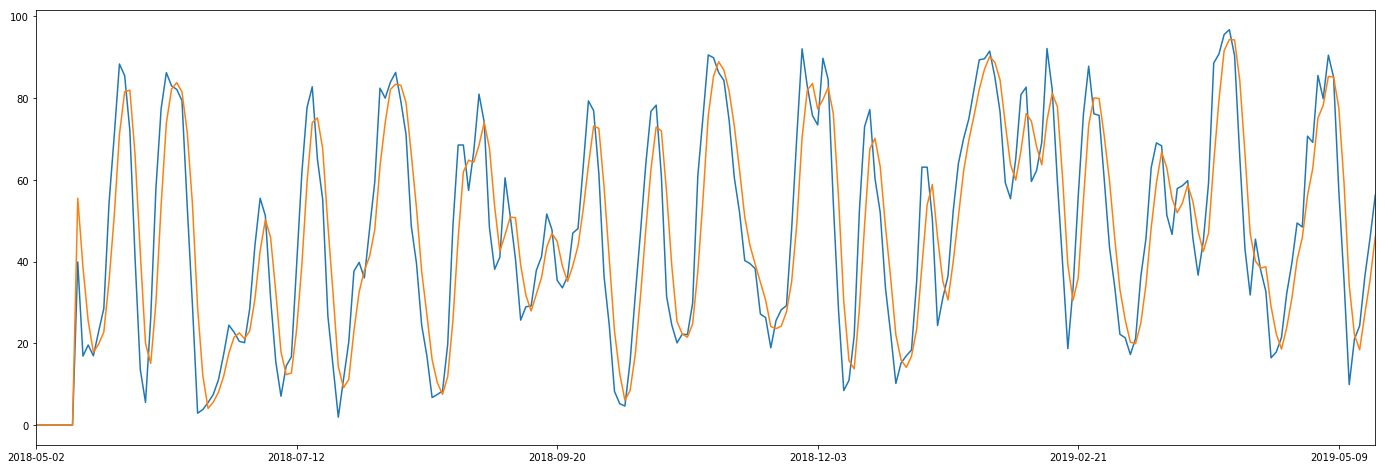

In [30]:
df['K'].plot(figsize=(24,8))
df['D'].plot(figsize=(24,8))

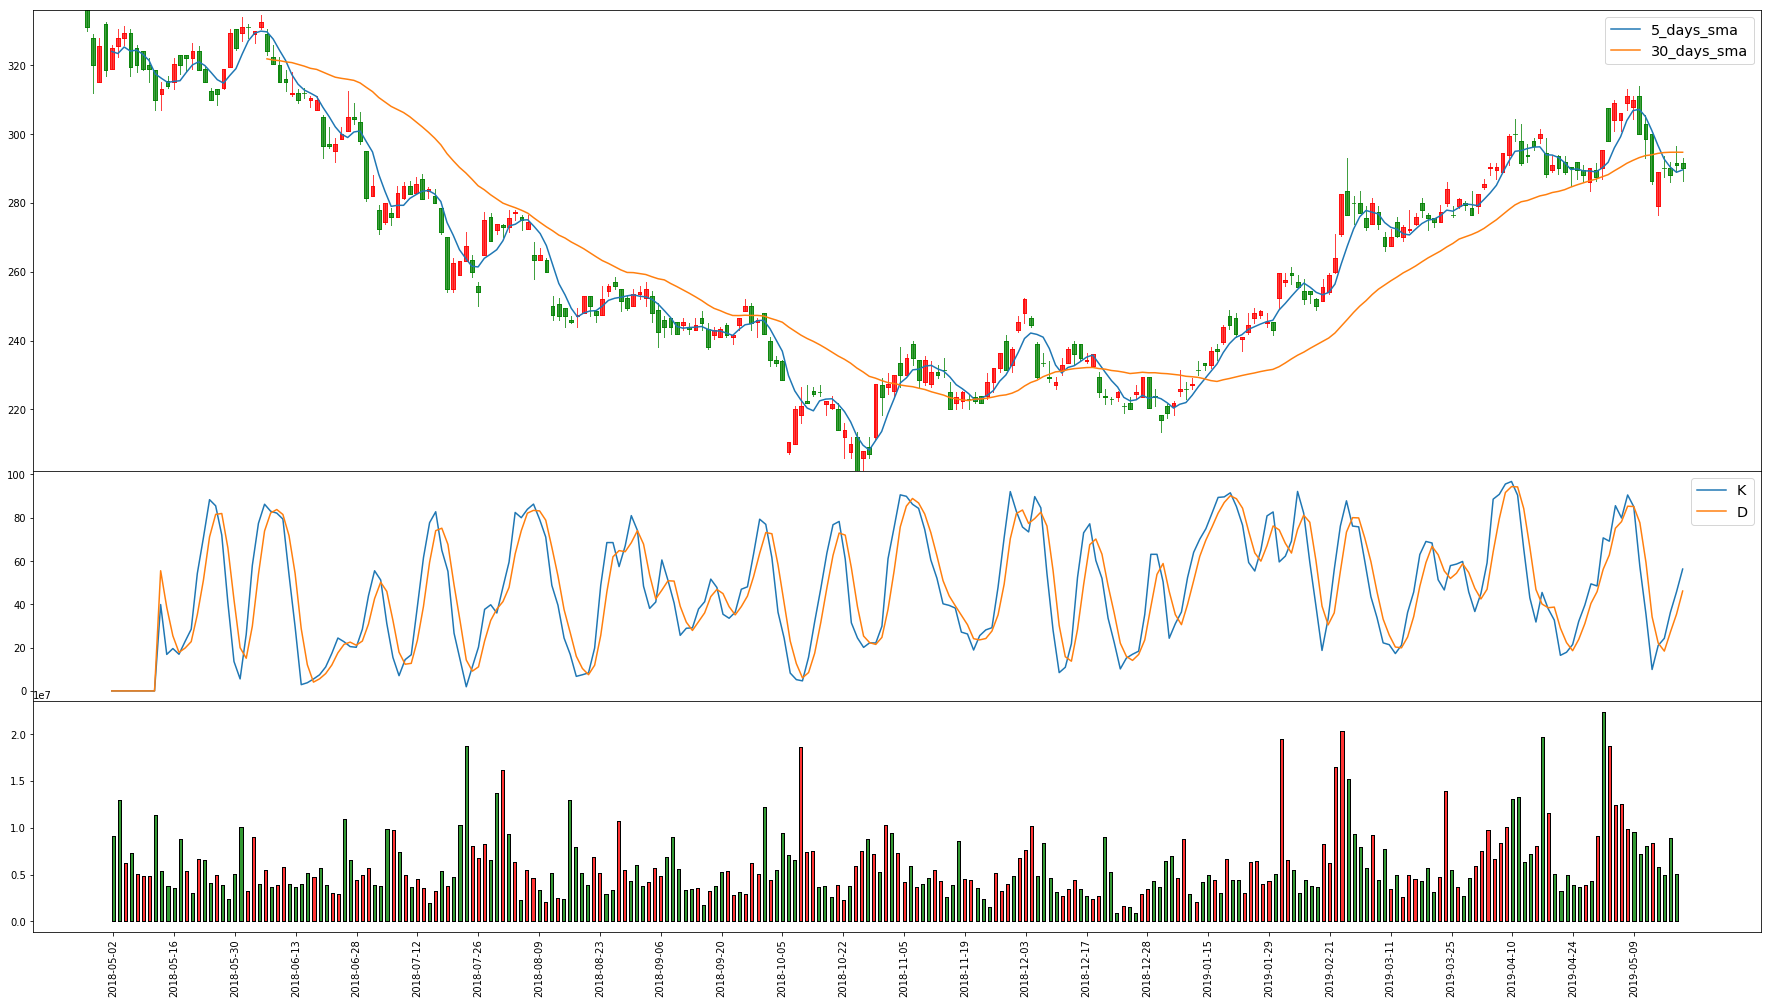

In [31]:
fig = plt.figure(figsize=(24, 16))

ax = fig.add_axes([0,0.4,1,0.4]) 
ax2 = fig.add_axes([0,0.2,1,0.2])
ax3 = fig.add_axes([0,0,1,0.2])
ax3.set_xticks(range(0, len(df.index), 10))
ax3.set_xticklabels(df.index[::10],rotation=90)

mpf.candlestick2_ohlc(ax, df['open'],df['high'], df['low'], df['close'], width=0.6, colorup='r', colordown='g', alpha=0.75); 
mpf.volume_overlay(ax3, df['open'], df['close'], df['capacity'], colorup='r', colordown='g', width=0.5, alpha=0.8)

sma_5 = abstract.SMA(df,5)
sma_30 = abstract.SMA(df,30)
ax.plot(sma_5, label='5_days_sma')
ax.plot(sma_30, label='30_days_sma')
ax.legend(fontsize='x-large')

KD = abstract.STOCH(df)
KD.index=df['close'].index
df['K'] = KD['slowk']
df['D'] = KD['slowd']
df = df.fillna(0)
ax2.plot(df['K'], label='K')
ax2.plot(df['D'], label='D')
ax2.legend(fontsize='x-large')